# Hepatitis 

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names

File ‘hepatitis.data’ already there; not retrieving.

File ‘hepatitis.names’ already there; not retrieving.



# Data Wrangling

In [4]:
names = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS',
'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

In [5]:
data = pd.read_csv("hepatitis.data", sep=",", names=names)

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the original encoding (1, 2) to (0, 1)\
Replace "?"(missing value) with NaN and convert from object type to numeric type

In [7]:
for att in data.columns:
    data[att].replace('?', np.NaN, inplace=True)
    data[att].replace((1, 2), (0, 1), inplace=True)
    data[att] = pd.to_numeric(data[att])

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("hepatitis_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read("hepatitis_prepared.csv",
                   extension="csv",
                   index_column="patient_id")

In [11]:
ep.pp.type_overview(adata)

Variable names for AnnData object with 20 vars and 155 obs                                   
╚══ 🔓 Unencoded variables                                                                   
    ╠══ Class -> data type: floating                                                         
    ╠══ AGE -> data type: floating                                                           
    ╠══ SEX -> data type: floating                                                           
    ╠══ STEROID -> data type: floating                                                       
    ╠══ ANTIVIRALS -> data type: floating                                                    
    ╠══ FATIGUE -> data type: floating                                                       
    ╠══ MALAISE -> data type: floating                                                       
    ╠══ ANOREXIA -> data type: floating                                                      
    ╠══ LIVER BIG -> data type: floating                                                     
    ╠══ LIVER FIRM -> data type: floating                                                    
    ╠══ SPLEEN PALPABLE -> data type: floating                                               
    ╠══ SPIDERS -> data type: floating                                                       
    ╠══ ASCITES -> data type: floating                                                       
    ╠══ VARICES -> data type: floating                                                       
    ╠══ BILIRUBIN -> data type: floating                                                     
    ╠══ ALK PHOSPHATE -> data type: floating                                                 
    ╠══ SGOT -> data type: floating                                                          
    ╠══ ALBUMIN -> data type: floating                                                       
    ╠══ PROTIME -> data type: floating                                                       
    ╚══ HISTOLOGY -> data type: floating                                                     

Quality control metrics missing. Calculating...

Feature PROTIME had more than 43.225806451612904% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


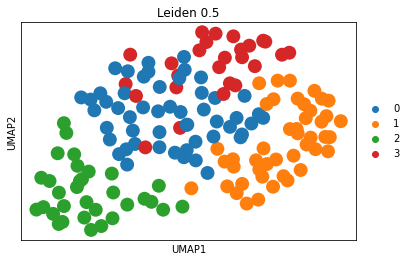

In [12]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

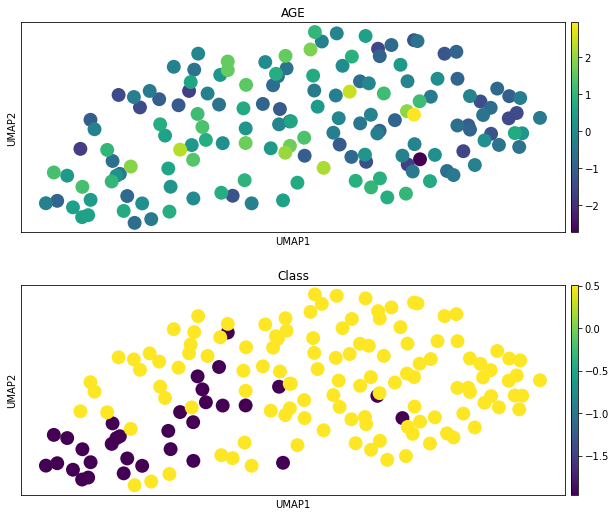

In [13]:
ep.pl.umap(adata, color=["AGE", "Class"], ncols=1, wspace=0.75)